<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

pd.set_option('display.max_columns', None)
# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [7]:
## Write your code here
data_types = df.dtypes
stat_summary = df.describe()
shape = df.shape

print(f"Column names and their data types: \n{data_types}")
print(f"Statistical Summary: \n{stat_summary}")
print(f"Shape of dataset: {shape}")
df.info()

Column names and their data types: 
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
Statistical Summary: 
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [11]:
## Write your code here
print(f"Empty rows in dataset: \n{df.isnull().sum()}")

# Imputing 'RemoteWork' with the most frequent value
most_freq = df["RemoteWork"].value_counts().idxmax()

df["RemoteWork"] = df["RemoteWork"].fillna(most_freq)

# There is no empty value in 'Employment'

# Drop empty rows in JobSat and YearsCodePro (critical columns) for analysis
df = df.dropna(subset=["JobSat", "YearsCodePro"])

# After dropping and imputation, number of missing rows
print(f"Missing values in 'Employment': {df["Employment"].isnull().sum()}")
print(f"Missing values in 'JobSat': {df["JobSat"].isnull().sum()}")
print(f"Missing values in 'RemoteWork': {df["RemoteWork"].isnull().sum()}")
print(f"Missing values in 'YearsCodePro': {df["YearsCodePro"].isnull().sum()}")

Empty rows in dataset: 
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
JobSatPoints_11          115
SurveyLength             391
SurveyEase               352
ConvertedCompYearly    12317
JobSat                     0
Length: 114, dtype: int64
Missing values in 'Employment': 0
Missing values in 'JobSat': 0
Missing values in 'RemoteWork': 0
Missing values in 'YearsCodePro': 0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [12]:
## Write your code here
print(f"Value counts of column 'Employment': \n{df["Employment"].value_counts()}")
print(f"Value counts of column 'JobSat': \n{df["JobSat"].value_counts()}")
print(f"Value counts of column 'YearsCodePro': \n{df["YearsCodePro"].value_counts()}")

Value counts of column 'Employment': 
Employment
Employed, full-time                                                                                                               21903
Employed, full-time;Independent contractor, freelancer, or self-employed                                                           2231
Independent contractor, freelancer, or self-employed                                                                               1242
Employed, part-time                                                                                                                 531
Employed, full-time;Student, part-time                                                                                              488
                                                                                                                                  ...  
Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time                     1

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


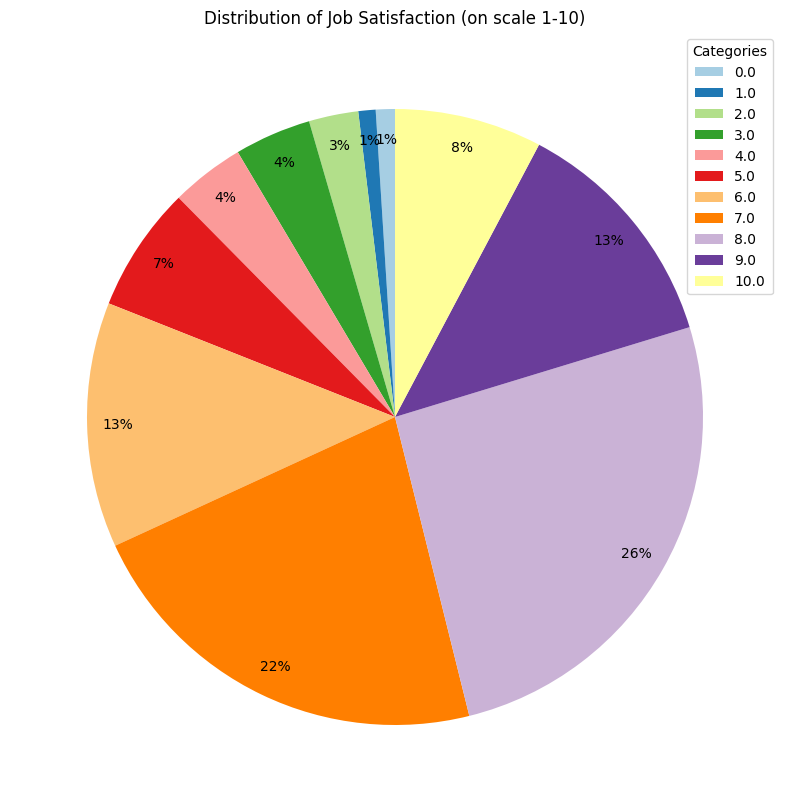

In [ ]:
## Write your code here
# Count the occurrences of each category in JobSat
job_sat_counts = df['JobSat'].value_counts().sort_index()
labels = job_sat_counts.index
explode = [0.1,0,0,0,0,0,0,0,0,0,0]

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(job_sat_counts, labels=None, autopct='%1.0f%%', startangle=90,
        colors=plt.cm.Paired.colors, pctdistance=0.9)
plt.legend(labels, loc="best", title="Categories")
plt.title('Distribution of Job Satisfaction (on scale 1-10)')
plt.show()

# Plot interpretation:
'''
Most of the respondants are satisfied with their job

21% are extremely satisfied (rating 9-10)
61% are moderately satisfied (rating 6-8)
7% are neutral, neither satisfied nor dissatisfied (rating 5)
13% are dissatisfied (rating 1-4) 
'''

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [ ]:
## Write your code here
# Split 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith' in individual Languages
LanguageHaveWorkedWith = df["LanguageHaveWorkedWith"].dropna().str.split(';').explode()
LanguageWantToWorkWith = df["LanguageWantToWorkWith"].dropna().str.split(';').explode()

# Get the count of values
LanguageHaveWorkedWith_count = LanguageHaveWorkedWith.value_counts()
LanguageWantToWorkWith_count = LanguageWantToWorkWith.value_counts()

# Print the counted values
print(LanguageWantToWorkWith_count,"\n",LanguageHaveWorkedWith_count)
print(LanguageWantToWorkWith_count)

LanguageWantToWorkWith
Python                     11721
SQL                        11608
JavaScript                 11489
TypeScript                 10710
HTML/CSS                   10014
Rust                        8656
Go                          7297
Bash/Shell (all shells)     6961
C#                          6703
Java                        5050
C++                         4476
Kotlin                      3727
C                           3231
PHP                         2601
PowerShell                  2250
Swift                       1866
Zig                         1703
Dart                        1692
Elixir                      1555
Ruby                        1392
Lua                         1391
Assembly                    1038
Scala                        960
Haskell                      953
R                            880
F#                           712
Clojure                      674
GDScript                     647
Erlang                       572
Lisp                

In [51]:
# Merge both the counts in single dataframe
languages = pd.DataFrame({
    'LanguageHaveWorkedWith_count': LanguageHaveWorkedWith_count,
    'LanguageWantToWorkWith_count': LanguageWantToWorkWith_count
})
languages.fillna(0)

,LanguageHaveWorkedWith_count,LanguageWantToWorkWith_count
Ada,150,167
Apex,232,149
Assembly,1117,1038
Bash/Shell (all shells),10465,6961
C,4747,3231
C#,8380,6703
C++,5676,4476
Clojure,359,674
Cobol,171,152
Crystal,102,172


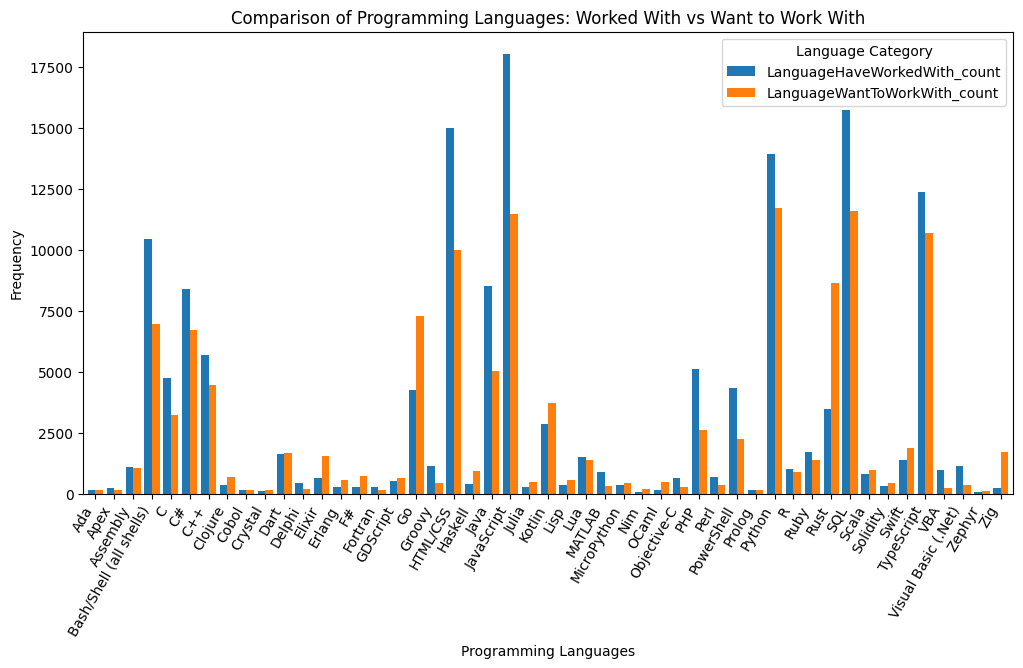

In [52]:
# Create a grouped bar chart
languages.plot(kind='bar', figsize=(12, 6), width=0.8)

# Labels and title
plt.title('Comparison of Programming Languages: Worked With vs Want to Work With')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Language Category')

# Display the plot
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


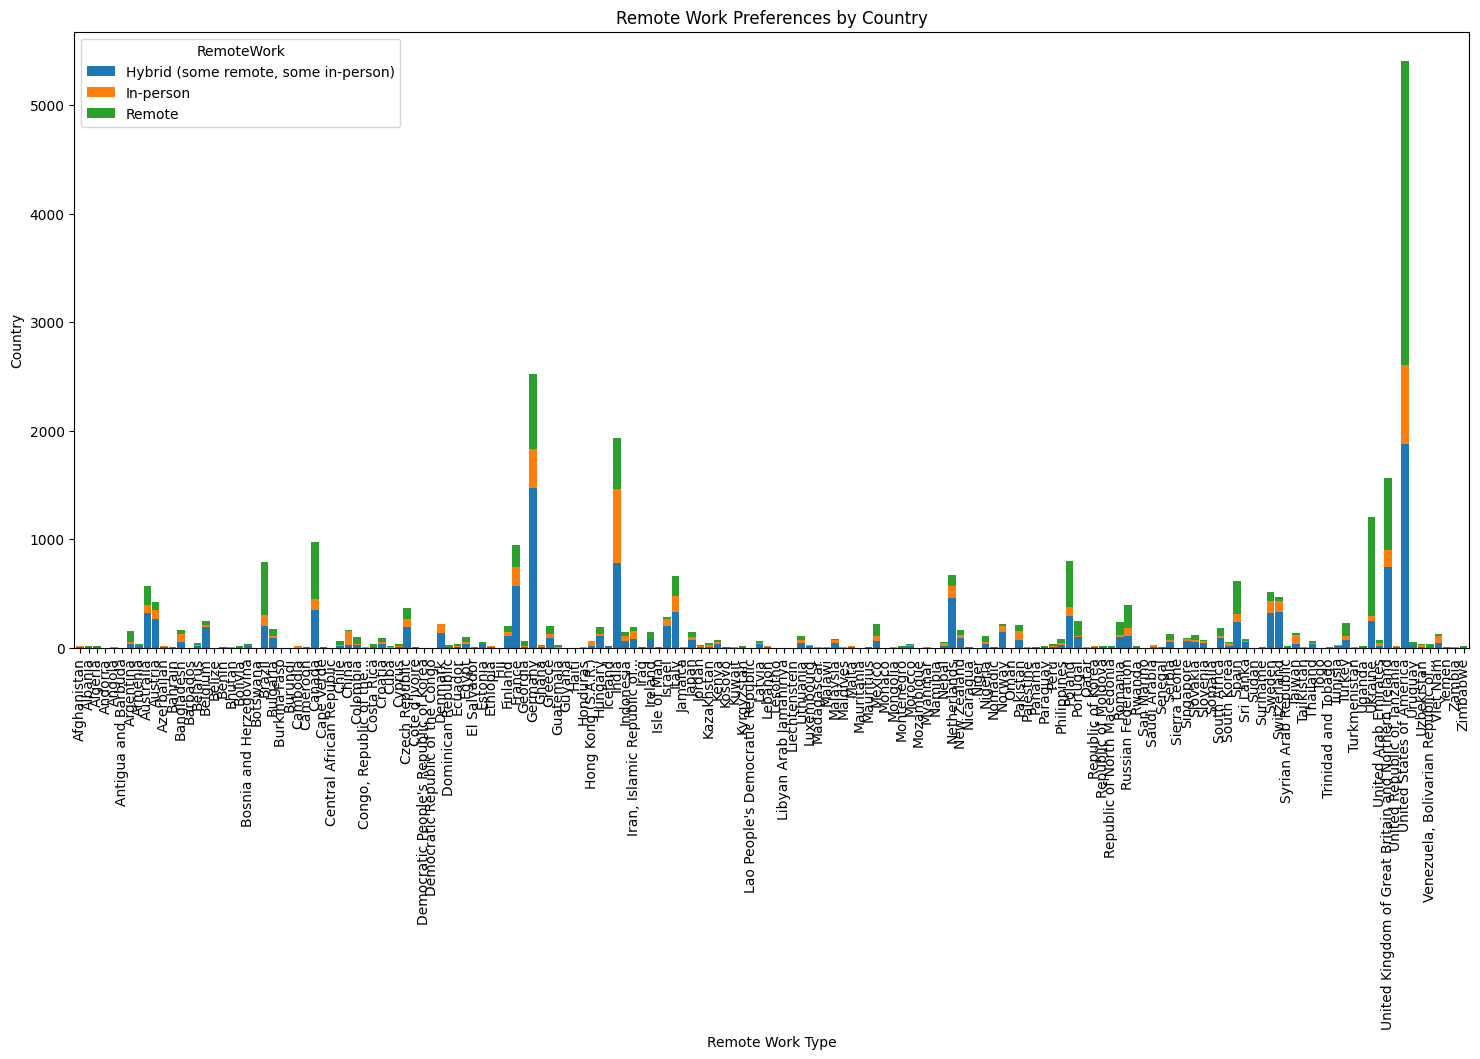

In [82]:
## Write your code here
# Group the data and count occurrences of RemoteWork by Country
remote_work_count_by_country = df.groupby(["Country", "RemoteWork"]).size().unstack()
remote_work_count_by_country = remote_work_count_by_country.fillna(0)

remote_work_count_by_country.plot(kind='bar', stacked=True, width=0.9, figsize=(18,8))
plt.title('Remote Work Preferences by Country')
plt.xlabel('Remote Work Type')
plt.ylabel('Country')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [75]:
## Write your code here
# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
corr_pearson = df["JobSat"].corr(df["YearsCodePro"],method='pearson')
corr_spearman = df["JobSat"].corr(df["YearsCodePro"],method='spearman')

print(f"Pearson Correlation: {corr_pearson:.3f}")
print(f"Spearman Correlation: {corr_spearman:.3f}")

Pearson Correlation: 0.103
Spearman Correlation: 0.121


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                 655   
Employed, full-time;Employed, part-time                                               6   
Employed, full-time;Independent contractor, fre...                                   72   
Employed, full-time;Independent contractor, fre...                                    7   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Independent contractor, free...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   
Student, full-time;Not employed, but looking fo...                                    0   

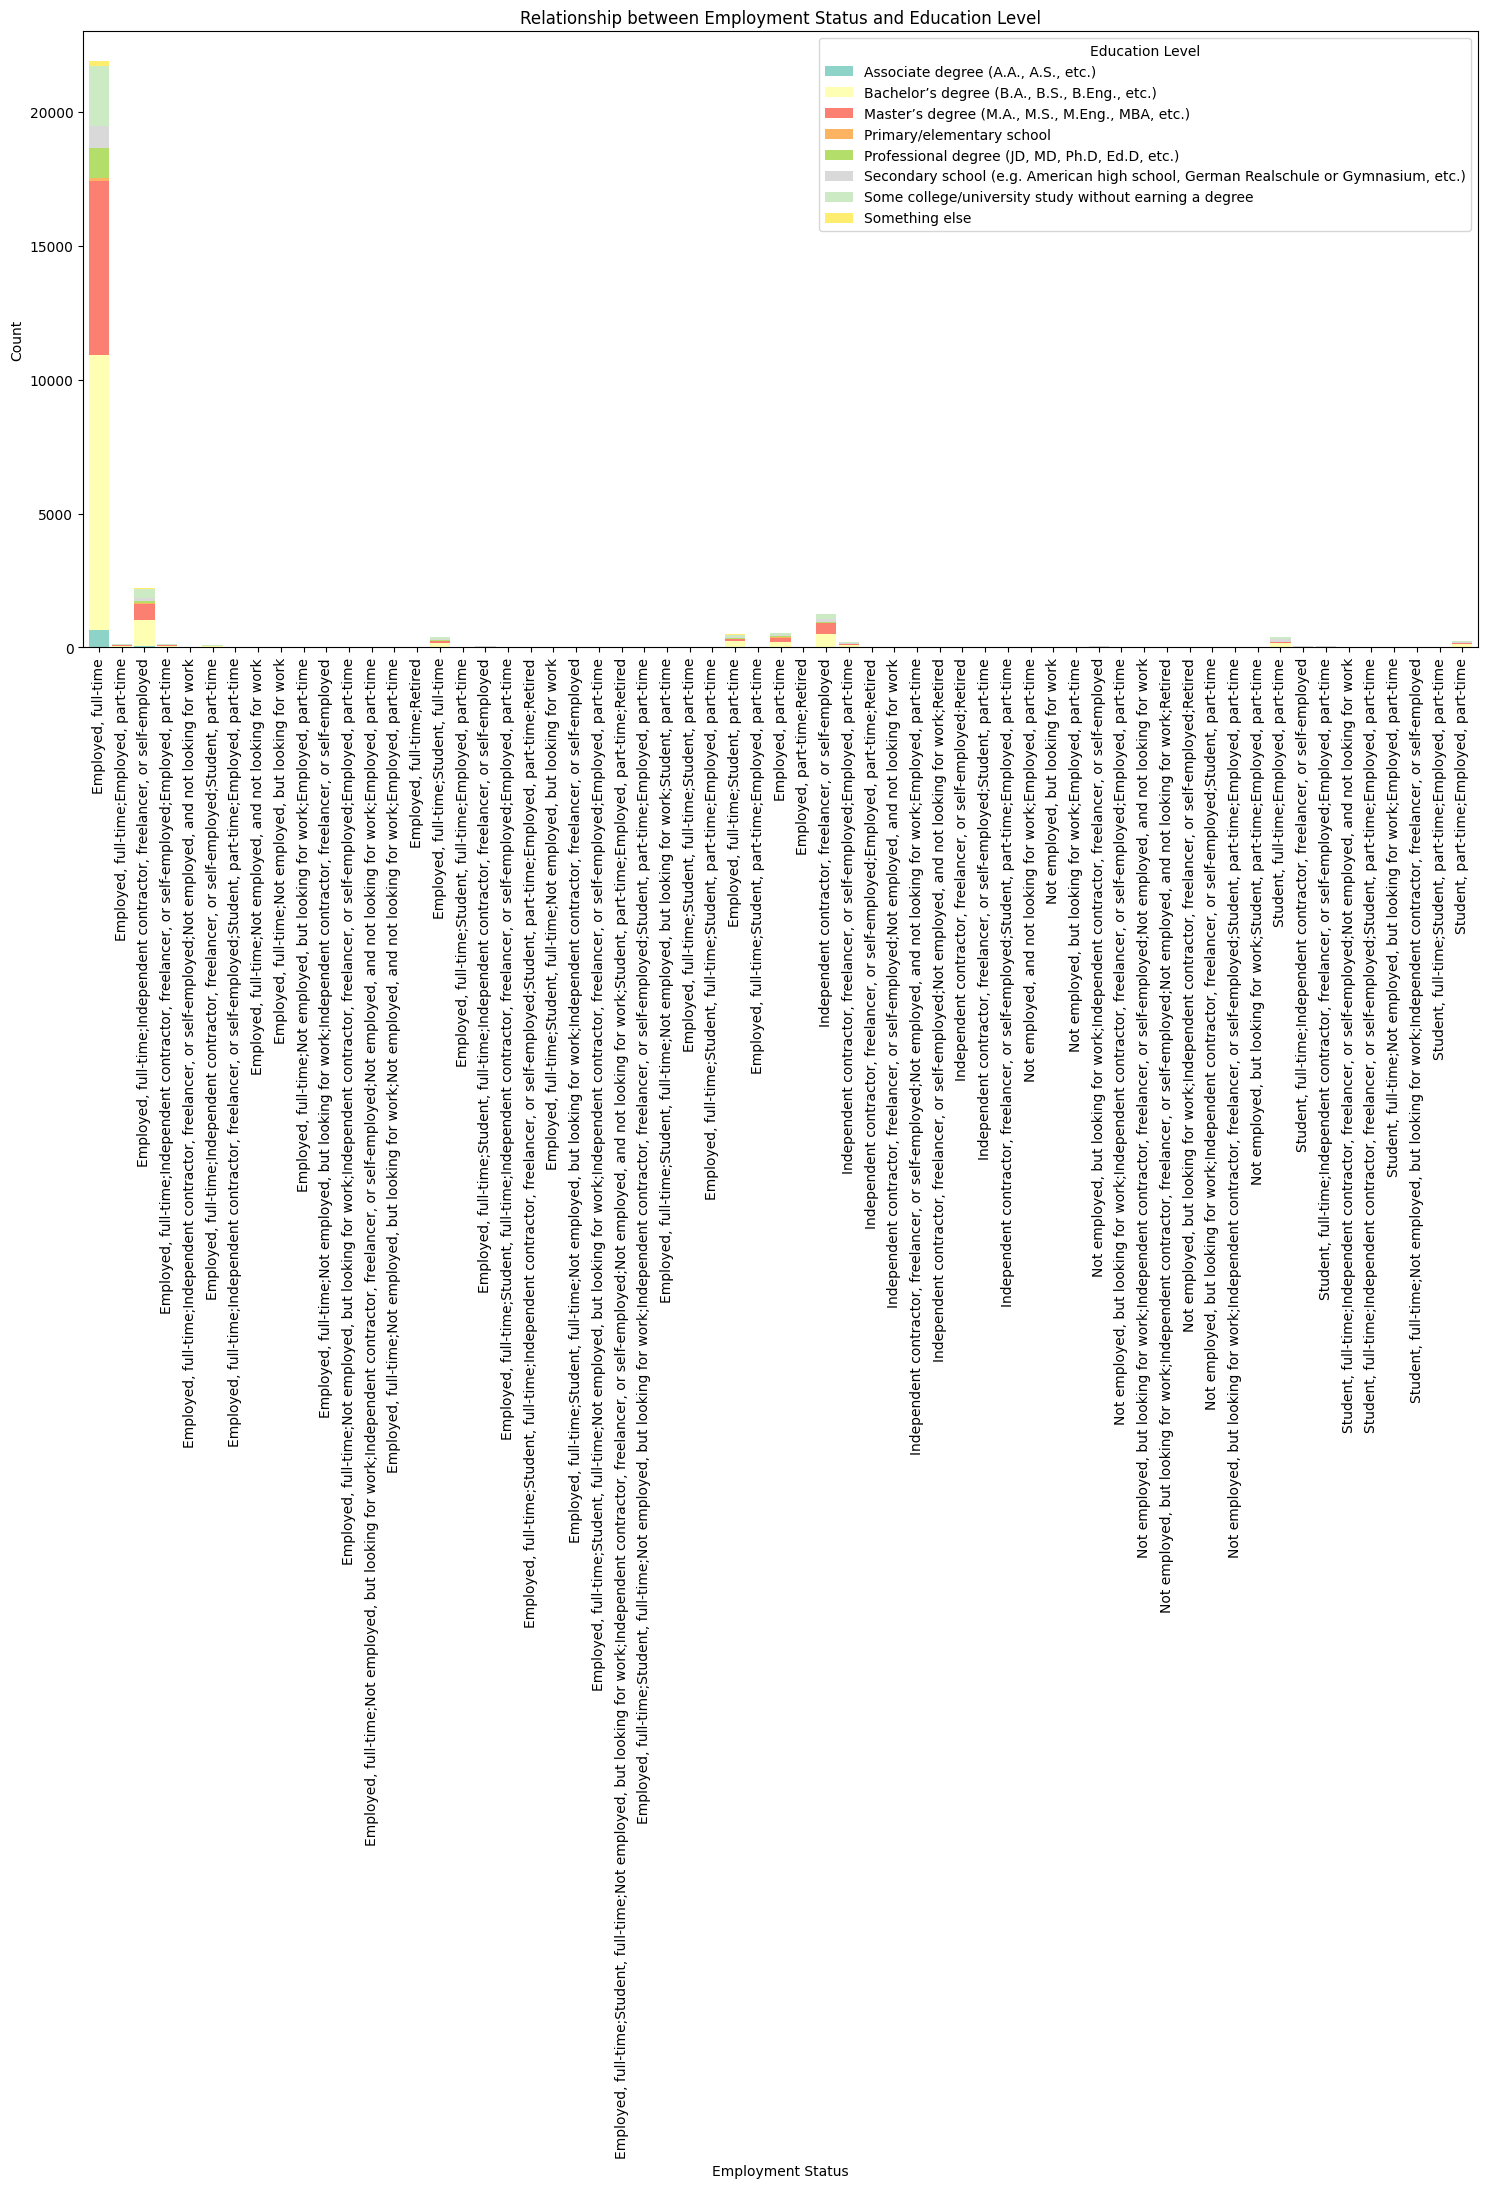

In [88]:
## Write your code here
# Create a cross-tabulation to show the relationship between Employment and EdLevel
cross_tab = pd.crosstab(df['Employment'], df['EdLevel'])
print(cross_tab)

# Plot a stacked bar chart to visualize the relationship
cross_tab.plot(kind='bar', stacked=True, figsize=(18,8), colormap='Set3', width=0.9)

# Labels and title
plt.title('Relationship between Employment Status and Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Education Level')

# Display the plot

plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
